In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import os
import zipfile
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url_zip = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
local_zip, _ = urllib.request.urlretrieve(url_zip)

In [3]:
zip_ = zipfile.ZipFile(local_zip)

In [4]:
zip_.extractall()
zip_.close()

In [14]:
base_dir = r'C:\Users\adm.m.gosciniak\Desktop\workspace\ANN-ML\cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [15]:
validation_dogs_dir

'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\validation\\dogs'

In [16]:
files = os.listdir(train_cats_dir)

In [17]:
files[0]

'cat.0.jpg'

In [18]:
os.path.join(train_cats_dir, files[0])

'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.0.jpg'

In [21]:
all_cat_files = os.listdir(train_cats_dir)
cats_files = [os.path.join(train_cats_dir, file) for file in all_cat_files][:25]
cats_files

['C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.0.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.1.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.10.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.100.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.101.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.102.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.103.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.104.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\cats\\cat.105.jpg',
 'C:\\Users\\adm.m.gosci

In [23]:
all_dog_files = os.listdir(train_dogs_dir)
dogs_files = [os.path.join(train_dogs_dir, file) for file in all_dog_files][:25]
dogs_files

['C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.0.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.1.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.10.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.100.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.101.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.102.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.103.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.104.jpg',
 'C:\\Users\\adm.m.gosciniak\\Desktop\\workspace\\ANN-ML\\cats_and_dogs_filtered\\train\\dogs\\dog.105.jpg',
 'C:\\Users\\adm.m.gosci

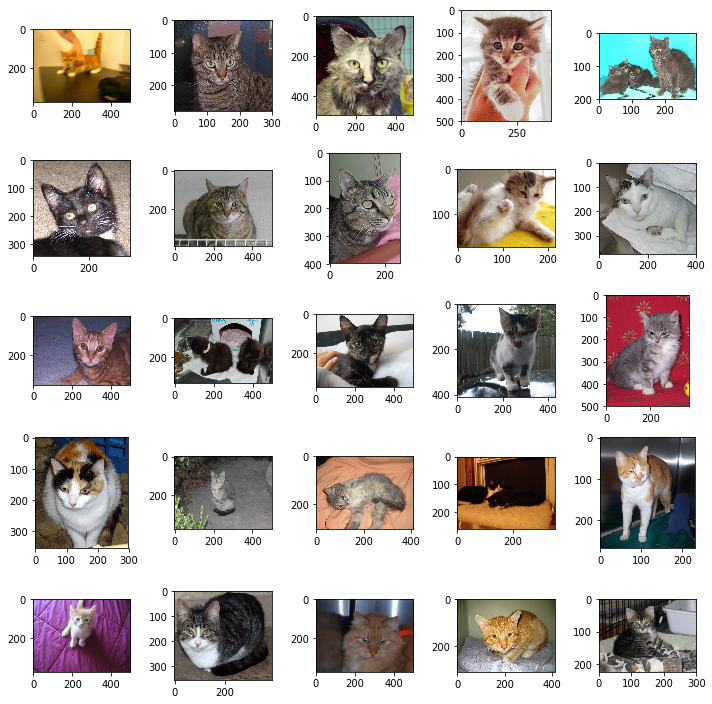

In [27]:
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
for idx, img_path in enumerate(cats_files):
    plt.subplot(5, 5, idx+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.tight_layout()

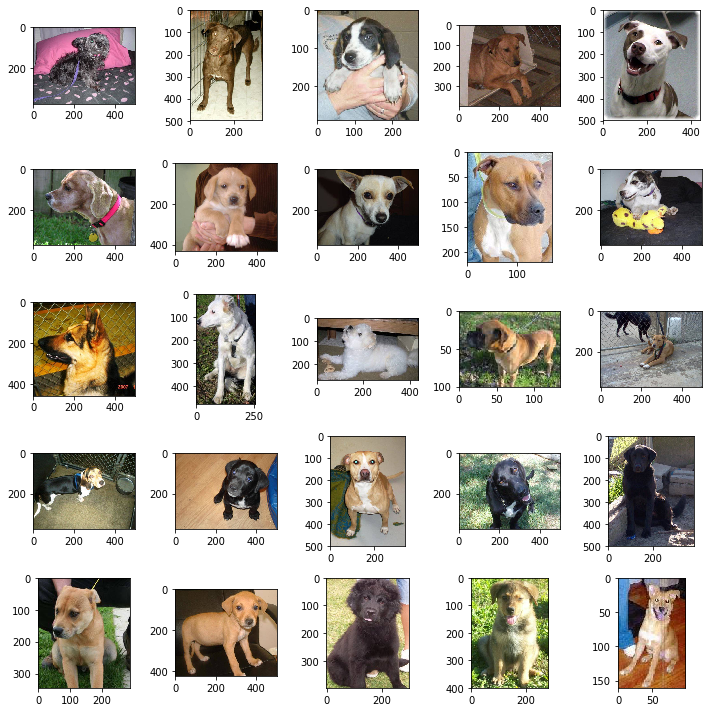

In [28]:
def plot_images(item_dir, top=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]
    
    plt.figure(figsize=(10,10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.tight_layout()

plot_images(train_dogs_dir)


In [32]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 29s - loss: 0.9976 - acc: 0.5040 - val_loss: 0.6873 - val_acc: 0.5630
Epoch 2/5
 - 27s - loss: 0.6889 - acc: 0.5330 - val_loss: 0.6658 - val_acc: 0.6050
Epoch 3/5
 - 28s - loss: 0.6905 - acc: 0.5210 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 4/5
 - 27s - loss: 0.6882 - acc: 0.5235 - val_loss: 0.6617 - val_acc: 0.6010
Epoch 5/5
 - 28s - loss: 0.6763 - acc: 0.5675 - val_loss: 0.6531 - val_acc: 0.5990


In [37]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2,2)),
    
    Conv2D(128, (3,3)),
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)             0         
__________

In [38]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/20
 - 38s - loss: 0.8780 - acc: 0.5035 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/20
 - 36s - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6932 - val_acc: 0.4950
Epoch 3/20
 - 36s - loss: 0.6932 - acc: 0.4985 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/20
 - 36s - loss: 0.6932 - acc: 0.4925 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 5/20
 - 36s - loss: 0.6932 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 6/20
 - 36s - loss: 0.6932 - acc: 0.4825 - val_loss: 0.6932 - val_acc: 0.4890
Epoch 7/20
 - 35s - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5050
Epoch 8/20
 - 36s - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 9/20
 - 35s - loss: 0.6932 - acc: 0.4915 - val_loss: 0.6932 - val_acc: 0.4990
Epoch 10/20
 - 36s - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5200
Epoch 11/20
 - 35s - loss: 0.6932 - acc: 0.4750 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 12/20
 - 36s - loss: 0.6932 - acc: 0.4950 - val_loss: 0.6932 - val_a